# Packages

In [1]:
import sys

sys.executable  # envs/snakepipes_detect-seq/bin/python

'/Users/zhaohuanan/micromamba/envs/snakepipes_detect-seq/bin/python'

In [2]:
from bioat.lib.libpath import HOME
from bioat.lib.libpandas import set_option

set_option()
print(HOME)

INFO  @ 2023-08-28 20:35:27 bioat.lib.libpandas.set_option: set pandas: max_colwidth=40
INFO  @ 2023-08-28 20:35:27 bioat.lib.libpandas.set_option: set pandas: display.width=120
INFO  @ 2023-08-28 20:35:27 bioat.lib.libpandas.set_option: set pandas: display.max_columns=None
INFO  @ 2023-08-28 20:35:27 bioat.lib.libpandas.set_option: set pandas: display.max_rows=50


/Users/zhaohuanan


In [3]:
# circosplot
import collections
import pandas as pd
import math
from bioat.lib.libcircos import Garc, Gcircle, table_hg38_chromosome_length, table_hg38_cytoband
from bioat.lib.libcolor import plot_colortable
import matplotlib.pyplot as plt

# Global analysis

## circos plot

In [4]:
# resources
url = "https://raw.githubusercontent.com/hermanzhaozzzz/bioat/master/data/circos"

### 辅助函数

#### plot_colortable

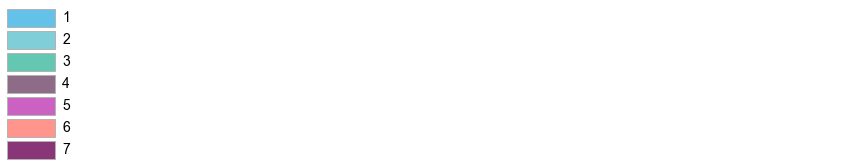

In [5]:
# %% function for legend
# %%% test func plot_colortable
colors = ['#64C1E8',
          '#80CED7',
          '#63C7B2',
          '#8E6C88',
          '#CA61C3',
          '#FF958C',
          '#883677']
g = plot_colortable(colors, ncols=1, labels=[1, 2, 3, 4, 5, 6, 7])
# g

#### gcircle_add_garc

In [6]:
def gcircle_add_garc(x):
    arc = Garc(
        arc_id=x['chrom'], size=x['chromEnd'], interspace=1, raxis_range=(920, 950),
        labelposition=40, label_visible=True, facecolor='#FFFFFF'
    )
    circle.add_garc(arc)

### table
#### chromosomes

In [7]:
df_chrom = table_hg38_chromosome_length()
df_chrom = df_chrom[df_chrom['chrom'].map(lambda x: x not in ['chrY', 'chrM'])].copy()
df_chrom

,chrom,chromStart,chromEnd
0,chr1,1,248956422
1,chr2,1,242193529
2,chr3,1,198295559
3,chr4,1,190214555
4,chr5,1,181538259
5,chr6,1,170805979
6,chr7,1,159345973
7,chr8,1,145138636
8,chr9,1,138394717
9,chr10,1,133797422


#### cytoBand

In [8]:
df_cytoband = table_hg38_cytoband()
df_cytoband = df_cytoband[df_cytoband['chrom'].map(lambda x: x not in ['chrY', 'chrM'])].copy()
df_cytoband['width'] = df_cytoband['chromEnd'] - df_cytoband['chromStart']
df_cytoband

,chrom,chromStart,chromEnd,name,gieStain,width
0,chr1,0,2300000,p36.33,gneg,2300000
1,chr1,2300000,5300000,p36.32,gpos25,3000000
2,chr1,5300000,7100000,p36.31,gneg,1800000
3,chr1,7100000,9100000,p36.23,gpos25,2000000
4,chr1,9100000,12500000,p36.22,gneg,3400000
...,...,...,...,...,...,...
846,chrX,134500000,138900000,q26.3,gneg,4400000
847,chrX,138900000,141200000,q27.1,gpos75,2300000
848,chrX,141200000,143000000,q27.2,gneg,1800000
849,chrX,143000000,148000000,q27.3,gpos100,5000000


#### points

In [9]:
# sort_keys = df_points.groupby('<sample>').count().sort_values(by='chr', ascending=False).index
sort_keys = ['DetectSeq_SIRT6-DddA11_REP-1', 'DetectSeq_SIRT6-DddA11_REP-2',
             'DetectSeq_JAK2-DddA11_REP-1', 'DetectSeq_JAK2-DddA11_REP-2',
             'DetectSeq_ATP8-DddA11_REP-1', 'DetectSeq_ATP8-DddA6_REP-1', 'DetectSeq_ATP8-DddAwt_REP-1']
colors = ['#64C1E8',
          '#80CED7',
          '#5AB4C8',
          '#78C8C8',
          '#FF958C',
          '#D7BFF8',
          '#F8EDD0']

In [10]:
# for first run!!!!
# df_points = pd.read_csv('../final_list_after_igv_check/2023-04-24_merged_final_list_add_header_poisson_result.csv',
#                         usecols=['<sample>', 'chr_name', 'region_start', 'region_end', 'treat_mut_count.norm', 'region_highest_site_mut_ratio']
#                        )
# # detect-seq score!!
# # detect-seq score!!
# df_points['value1'] = df_points['region_highest_site_mut_ratio'] * df_points['region_highest_site_mut_ratio'] * df_points['treat_mut_count.norm'] * 100  # detect-seq score!!
# df_points.columns = ['<sample>', 'chr', 'start', 'end', 'region_highest_site_mut_ratio', 'treat_mut_count.norm','value1']
# df_points = df_points[['<sample>', 'chr', 'start', 'end','value1']].copy()
# df_points = df_points[df_points['chr'].map(lambda x: x not in ['chrY', 'chrM'])].copy()
# df_points['log10_value'] = df_points['value1'].map(math.log10)
# df_points


# for second run after classification using step 09~12!!!!!
df_final_list = pd.read_csv('../final_list_after_igv_check/2023-08-25_merged_final_list_after_classification_step11.csv',
                        usecols=['<sample>', 'region_index', 'TAS-Dep_stat'])
# df_final_list
df_count_info = pd.read_csv('../poisson_res/poisson_res_all.tsv.gz', sep='\t',
                            usecols=['<sample>', 'mpmat_index', 'region_highest_site_mut_ratio', 'treat_mut_count.norm'])
df_count_info.rename(columns={'mpmat_index': 'region_index'}, inplace=True)
# df_count_info
df_points = pd.merge(df_final_list, df_count_info, on=['<sample>', 'region_index'], how='left')

# # detect-seq score!!
# # detect-seq score!!
df_points['value1'] = df_points['region_highest_site_mut_ratio'] * df_points['region_highest_site_mut_ratio'] * df_points['treat_mut_count.norm'] * 100  # detect-seq score!!
# df_points.columns = ['<sample>', 'chr', 'start', 'end', 'region_highest_site_mut_ratio', 'treat_mut_count.norm','value1']
df_points.columns = ['region_index', '<sample>', 'TAS-Dep_stat', 'region_highest_site_mut_ratio', 'treat_mut_count.norm','value1']
df_points[['chr', 'start', 'end']] = df_points['region_index'].str.split('_', expand=True)
df_points[['start', 'end']] = df_points[['start', 'end']].astype(int)
df_points = df_points[['<sample>', 'chr', 'start', 'end','value1']].copy()
df_points = df_points[df_points['chr'].map(lambda x: x not in ['chrY', 'chrM'])].copy()
df_points['log10_value'] = df_points['value1'].map(math.log10)
df_points

df_points

,<sample>,chr,start,end,value1,log10_value
0,DetectSeq_ATP8-DddA11_REP-1,chr10,123171505,123171552,1.390864,0.143285
1,DetectSeq_ATP8-DddA11_REP-1,chr1,170722780,170722831,2.472647,0.393162
2,DetectSeq_ATP8-DddA11_REP-1,chr9,109215689,109215762,1.429114,0.155067
3,DetectSeq_ATP8-DddA11_REP-1,chr3,37937249,37937275,1.471814,0.167853
4,DetectSeq_ATP8-DddA11_REP-1,chr4,6913454,6913499,1.951386,0.290343
...,...,...,...,...,...,...
15537,DetectSeq_SIRT6-DddA11_REP-2,chr10,128384499,128384514,1.645563,0.216315
15538,DetectSeq_SIRT6-DddA11_REP-2,chr12,15347619,15347715,8.084952,0.907677
15539,DetectSeq_SIRT6-DddA11_REP-2,chr8,10421103,10421126,19.275420,1.285004
15540,DetectSeq_SIRT6-DddA11_REP-2,chr1,165880762,165880807,6.790246,0.831885


### plot

#### plot chromosomes

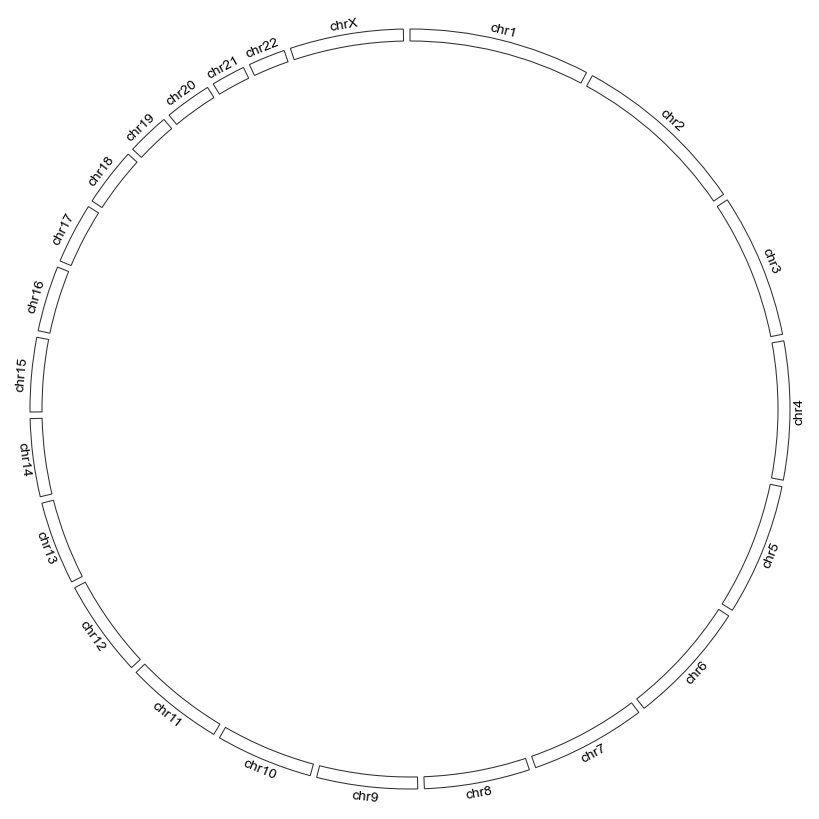

In [11]:
# 实例化一个Gcircle对象
circle = Gcircle()
df_chrom.apply(gcircle_add_garc, axis=1)
circle.set_garcs()
# circle.figure;

#### plot cytoband

- cytoband 染色体带: 处于中期的细胞染色体上形成的用于识别特定染色体的带型

In [12]:
df_cytoband.head()

,chrom,chromStart,chromEnd,name,gieStain,width
0,chr1,0,2300000,p36.33,gneg,2300000
1,chr1,2300000,5300000,p36.32,gpos25,3000000
2,chr1,5300000,7100000,p36.31,gneg,1800000
3,chr1,7100000,9100000,p36.23,gpos25,2000000
4,chr1,9100000,12500000,p36.22,gneg,3400000


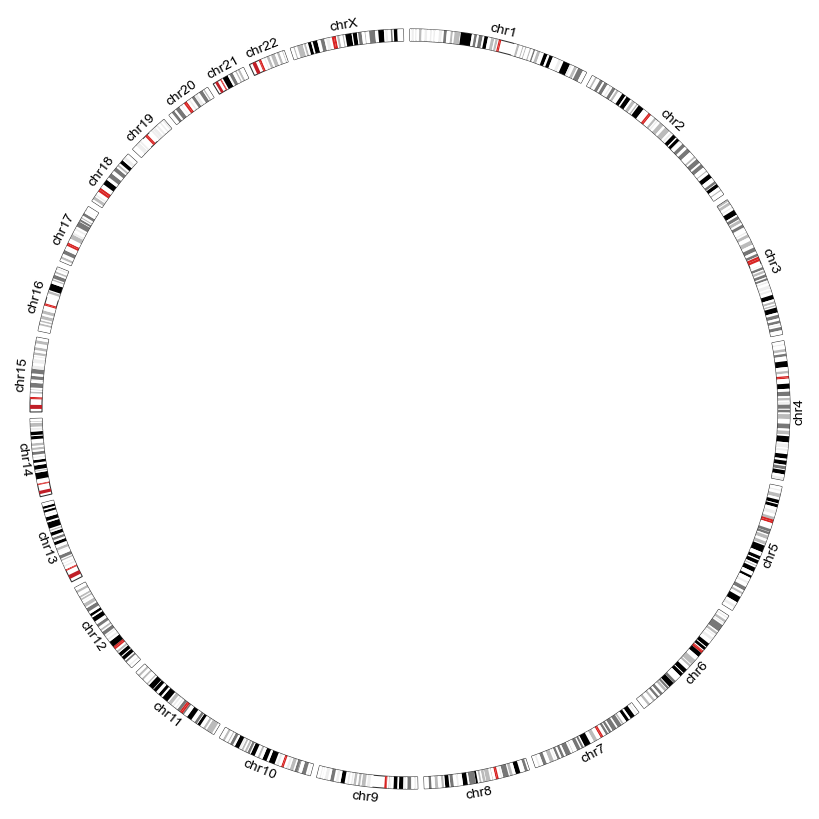

In [13]:
color_dict = {"gneg": "#FFFFFF", "gpos25": "#EEEEEE", "gpos50": "#BBBBBB", "gpos75": "#777777",
              "gpos100": "#000000", "gvar": "#FFFFFF00", "stalk": "#C01E27", "acen": "#D82322"}
arcdata_dict = collections.defaultdict(dict)

for idx, line in df_cytoband.iterrows():
    # print(line)
    name = line['chrom']
    start = line['chromStart']
    width = line['width']
    cyto = line['gieStain']

    if name not in arcdata_dict:
        arcdata_dict[name]["positions"] = []
        arcdata_dict[name]["widths"] = []
        arcdata_dict[name]["colors"] = []
    arcdata_dict[name]["positions"].append(start)
    arcdata_dict[name]["widths"].append(width)
    arcdata_dict[name]["colors"].append(color_dict[cyto])

for key in arcdata_dict:
    circle.barplot(key, data=[1] * len(arcdata_dict[key]["positions"]), positions=arcdata_dict[key]["positions"],
                   width=arcdata_dict[key]["widths"], raxis_range=[920, 950], facecolor=arcdata_dict[key]["colors"])

circle.figure

#### plot point

[795, 915]
[675, 795]
[555, 675]
[435, 555]
[315, 435]
[195, 315]
[75, 195]


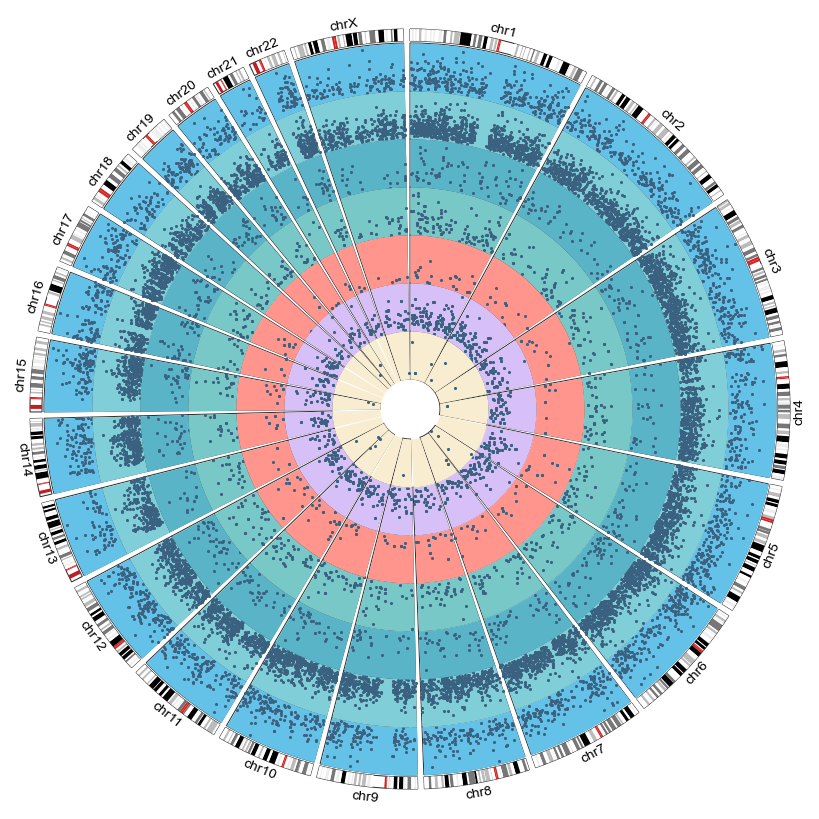

In [14]:
# %%% scatter plot  1s per 1k rows
color_dict = {"gneg": "#FFFFFF00", "gpos25": "#EEEEEE", "gpos50": "#BBBBBB", "gpos75": "#777777",
              "gpos100": "#000000", "gvar": "#FFFFFF00", "stalk": "#C01E27", "acen": "#D82322"}
keys_colors = list(zip(sort_keys, colors))
raxis_range = [915, 1035]

for sort_key, color in keys_colors:
    df = df_points.query('`<sample>`==@sort_key')
    df = df.copy()

    df['pos'] = raxis_range[1] - raxis_range[0]
    raxis_range[0] = raxis_range[0] - 120
    raxis_range[1] = raxis_range[1] - 120
    print(raxis_range)
    vmin = df['log10_value'].min()
    vmax = df['log10_value'].max()

    for idx, point in df_chrom.iterrows():  # 考虑把它放外头
        circle.fillplot(
            point['chrom'],
            data=df['pos'],
            # data=[raxis_range[1] - raxis_range[0]],
            rlim=[0, raxis_range[1] - raxis_range[0]],
            raxis_range=raxis_range,
            facecolor=color,
            edgecolor='white'
        )

    for chrom, point in df.groupby('chr'):
        # print(point)
        # print(color)

        circle.scatterplot(
            chrom,
            data=point['log10_value'],
            positions=(point['start'] + point['end']) / 2,
            rlim=[vmin - 0.05 * abs(vmin), vmax + 0.05 * abs(vmax)],
            raxis_range=raxis_range,
            facecolor="#3B6181",
            # edgecolor='black',
            spine=True,
            markersize=5
        )

circle.figure

In [15]:
# %%% save fig 1s per 1k rows
# !pwd
circle.figure.savefig("../pycircos/project_out.pdf", dpi=300)

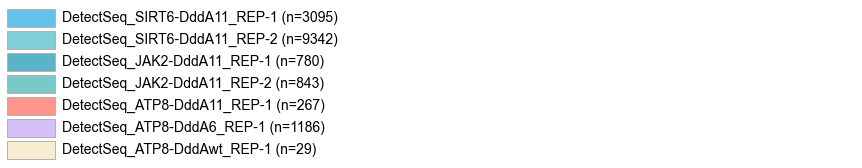

In [16]:
# %%% plot legend
df_sort_keys = pd.DataFrame(sort_keys, columns=['<sample>'])
df_sort_values = df_points.groupby('<sample>').count()['chr'].reset_index()
labels = pd.merge(df_sort_keys, df_sort_values).apply(
    lambda x: f'{x["<sample>"]} (n={x["chr"]})', axis=1
)

plot_colortable(colors=colors, ncols=1, labels=labels.tolist())
plt.savefig("../pycircos/project_out_legend.pdf")

In [17]:
# # update 2023-08-22 23:15:59
# | <sample>                     |   Dep_Left |   Dep_Right |   Dep_Both |   Independent |   Unassorted |   Total |
# |:-----------------------------|-----------:|------------:|-----------:|--------------:|-------------:|--------:|
# | DetectSeq_ATP8-DddA11_REP-1  |          1 |          99 |          6 |            63 |           98 |     267 |
# | DetectSeq_ATP8-DddA6_REP-1   |         14 |         454 |         20 |            39 |          659 |    1186 |
# | DetectSeq_ATP8-DddAwt_REP-1  |          1 |           7 |          0 |             8 |           13 |      29 |
# | DetectSeq_JAK2-DddA11_REP-1  |         33 |          15 |          2 |           645 |           85 |     780 |
# | DetectSeq_JAK2-DddA11_REP-2  |         26 |         212 |         17 |           319 |          269 |     843 |
# | DetectSeq_SIRT6-DddA11_REP-1 |        356 |          69 |         15 |          1176 |         1479 |    3095 |
# | DetectSeq_SIRT6-DddA11_REP-2 |       1158 |         275 |         48 |          1936 |         5925 |    9342 |